In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
for i in range(num_classes):
    plt.plot(t, data[i], label=f'Object {i+1}')
plt.legend()
plt.title('Synthetic Vibration Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Generating Fake Data

In [88]:
import numpy as np

np.random.seed(0)

# Parameters
num_samples = 10000  # Original number of samples in each time series
sample_length = 128  # Desired length of each sample
num_samples_per_class = 100  # Number of samples per class
num_classes = 3     # Number of different objects
interval = 0.01   # Hz, sampling rate

# Generate synthetic time-series data
t = np.arange(0, interval*num_samples, interval) # 10 seconds for 1 file

# Frequencies for different objects
frequencies = [5, 15, 25]  # Hz, different fundamental frequencies for simplicity

data = []
labels = []

for i in range(num_classes):
    # Create a sinusoidal waveform with random noise
    waveform = np.sin(2 * np.pi * frequencies[i] * t) + 0.5 * np.random.randn(num_samples)  # With noise
    
    # Split this waveform into multiple samples of length 128
    num_segments = num_samples // sample_length  # Calculate how many full segments fit in the waveform
    for j in range(min(num_samples_per_class, num_segments)):
        start_index = j * sample_length
        if start_index + sample_length <= num_samples:
            sample = waveform[start_index:start_index + sample_length] # ***Window Slicing***
            data.append(sample)
            labels.append(i)

# Convert to numpy arrays
data = np.array(data)  # This will have a shape of (300, 128) if each class contributes exactly 100 samples
labels = np.array(labels)

# Print shapes to verify
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (234, 128)
Labels shape: (234,)


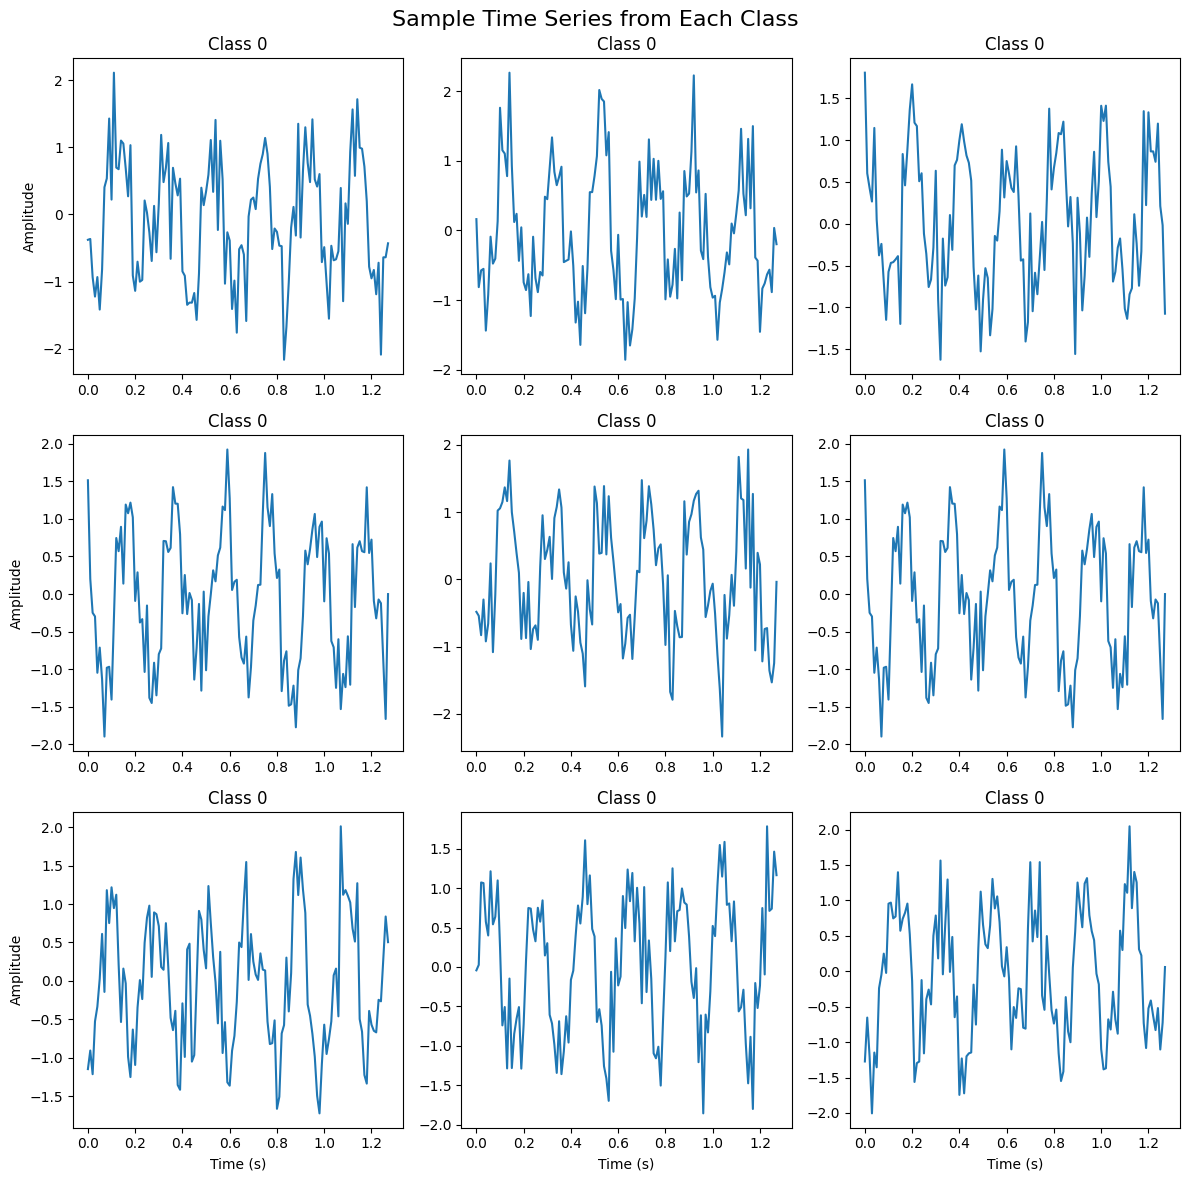

In [89]:
# Select a random sample from each class
sample_indices = np.random.choice(np.arange(len(data[labels == 0])), 3)
sample_indices = np.append(sample_indices, np.random.choice(np.arange(len(data[labels == 1])), 3))
sample_indices = np.append(sample_indices, np.random.choice(np.arange(len(data[labels == 2])), 3))

samples = data[sample_indices]

# Plot the samples
time = np.arange(0, sample_length) * interval

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        axes[i, j].plot(time, samples[index])
        axes[i, j].set_title(f"Class {labels[sample_indices[index]]}")
        axes[i, j].set_xlabel("Time (s)")
        axes[i, j].set_ylabel("Amplitude")

        # Hide x-axis labels for all subplots except the bottom row
        if i < 2:
            axes[i, j].set_xlabel("")

        # Hide y-axis labels for all subplots except the first column
        if j > 0:
            axes[i, j].set_ylabel("")

fig.suptitle("Sample Time Series from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

### Train test split

In [90]:
from sklearn.model_selection import train_test_split

# Assuming 'fft_data' is your input features and 'labels' is your target output
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (187, 128)
Testing set shape: (47, 128)


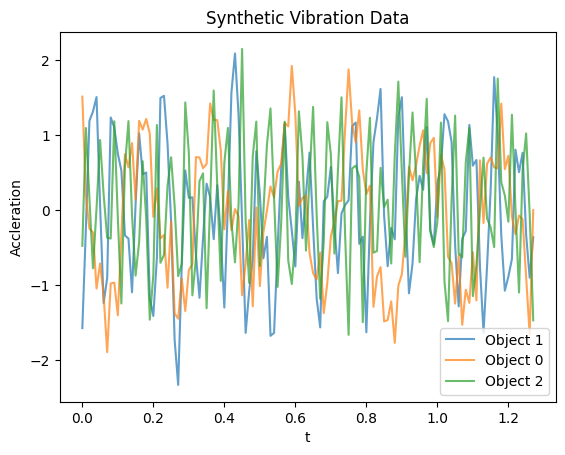

In [91]:
plt.plot(time, X_train[0].flatten(), label=f'Object {y_train[0]}', alpha = 0.7)
plt.plot(time, X_train[80].flatten(), label=f'Object {y_train[80]}', alpha = 0.7)
plt.plot(time, X_train[150].flatten(), label=f'Object {y_train[150]}', alpha = 0.7)

plt.legend()
plt.title('Synthetic Vibration Data')
plt.xlabel('t')
plt.ylabel('Accleration')
plt.show()

# FFT

In [92]:
def prepare_fft_data(data):
    # Compute the FFT along each row (time-series sample)
    fft_data = np.fft.rfft(data, axis=1)
    # Compute magnitude of the FFT
    fft_magnitude = np.abs(fft_data)
    # Normalize the magnitude by the maximum value within each sample
    fft_magnitude = fft_magnitude / np.max(fft_magnitude, axis=1, keepdims=True)
    # Add a channel dimension for CNN compatibility
    fft_magnitude = fft_magnitude[..., np.newaxis]
    return fft_magnitude

In [93]:
X_train_fft, X_test_fft = prepare_fft_data(X_train), prepare_fft_data(X_test)

print("Shape of X_train_fft:", X_train_fft.shape)
print("Shape of X_test_fft:", X_test_fft.shape)

Shape of X_train_fft: (187, 65, 1)
Shape of X_test_fft: (47, 65, 1)


### Visualisation of FFT

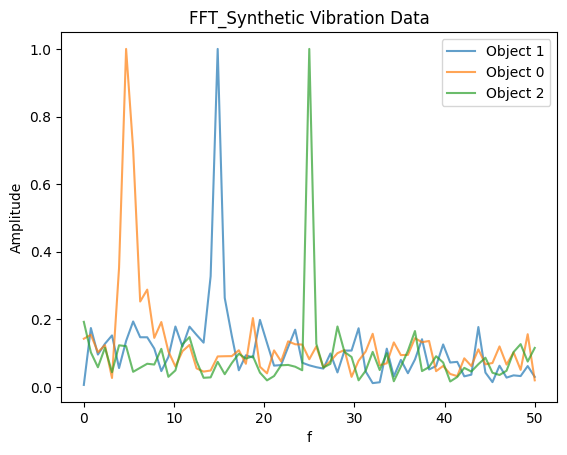

In [94]:
f = np.fft.rfftfreq(sample_length, 0.01)

plt.plot(f, X_train_fft[0].flatten(), label=f'Object {y_train[0]}', alpha = 0.7)
plt.plot(f, X_train_fft[80].flatten(), label=f'Object {y_train[80]}', alpha = 0.7)
plt.plot(f, X_train_fft[150].flatten(), label=f'Object {y_train[150]}', alpha = 0.7)

plt.legend()
plt.title('FFT_Synthetic Vibration Data')
plt.xlabel('f')
plt.ylabel('Amplitude')
plt.show()

In [95]:
f

array([ 0.     ,  0.78125,  1.5625 ,  2.34375,  3.125  ,  3.90625,
        4.6875 ,  5.46875,  6.25   ,  7.03125,  7.8125 ,  8.59375,
        9.375  , 10.15625, 10.9375 , 11.71875, 12.5    , 13.28125,
       14.0625 , 14.84375, 15.625  , 16.40625, 17.1875 , 17.96875,
       18.75   , 19.53125, 20.3125 , 21.09375, 21.875  , 22.65625,
       23.4375 , 24.21875, 25.     , 25.78125, 26.5625 , 27.34375,
       28.125  , 28.90625, 29.6875 , 30.46875, 31.25   , 32.03125,
       32.8125 , 33.59375, 34.375  , 35.15625, 35.9375 , 36.71875,
       37.5    , 38.28125, 39.0625 , 39.84375, 40.625  , 41.40625,
       42.1875 , 42.96875, 43.75   , 44.53125, 45.3125 , 46.09375,
       46.875  , 47.65625, 48.4375 , 49.21875, 50.     ])

# Model

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

### Method 1: 1D CNN on Raw Time-Series Data

The architecture for a 1D CNN processing raw time-series data can differ from one processing FFT data primarily in how it handles the input features. Raw time-series data maintains temporal dependencies directly, while FFT data represents frequency components where each feature corresponds to a specific frequency band and its associated magnitude (and possibly phase).

For raw time-series:
- Input Layer: The input layer must handle sequences of raw time series directly.
- Convolutional Layers: The model might use more or larger filters initially to capture the wide range of patterns in raw temporal data, unlike the more structured frequency domain.
- Pooling Layers: These might be more aggressive to reduce dimensionality while preserving important features.

In [97]:
raw_cnn = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(sample_length, 1)),   # number of samples in a single time series, 1 => Single channel? (x)
    MaxPooling1D(pool_size=2),  # window size of the pooling layer = 2
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),  # reshape the data from multi-dimensional into a single vector
    Dense(128, activation='relu'),  # FC layer with 128 neurons
    Dropout(0.5),   # drop out 50% of neurons to prevent overfitting
    Dense(num_classes, activation='softmax')    # output layer with 3 neurons (number of classes)
])

### Method 2: LSTM on Raw Time-Series Data

LSTM (Long Short-Term Memory) networks are a type of RNN (Recurrent Neural Network) optimized to handle long-term dependencies in sequence data, making them ideal for raw time-series where temporal patterns span over various intervals.


In [98]:
from tensorflow.keras.layers import LSTM

In [99]:
raw_lstm = Sequential([
    LSTM(100, input_shape=(sample_length, 1), return_sequences=False),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

### Method 3:

In [100]:
# Define a simple 1D CNN model
fft_cnn = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X_train_fft.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

### Performance Metric for Comparison


To compare the performance of these three methods (FFT-based CNN, raw-based CNN, and LSTM), accuracy is a common metric, especially if the classes are balanced. However, for more nuanced insights, especially in imbalanced datasets, metrics such as Precision, Recall, F1-Score, and AUC-ROC curve can be more informative.

- Accuracy: Measures the overall correctness of the model.
- Precision and Recall: Particularly useful if there are class imbalances or if the cost of false positives/negatives is high.
- F1-Score: The harmonic mean of precision and recall, providing a balance between the two in cases of uneven class distribution.
- AUC-ROC: Area Under the Curve - Receiver Operating Characteristic, a plot of true positive rate against false positive rate, useful for evaluating performance across different classification thresholds.

### Training and Evaluation


Each model should be compiled and trained using similar hyperparameters where possible (like epochs, batch size) and evaluated using the chosen metric(s) on a consistent test set to ensure fair comparison.

In [104]:
from tensorflow.keras.optimizers import Adam

# Compile models
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
optimizer3 = Adam(learning_rate=0.001)

fft_cnn.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
raw_cnn.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
raw_lstm.compile(optimizer=optimizer3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [106]:
# Assuming X_train, y_train, X_test, y_test are properly preprocessed and available
# Fit models
history_fft_cnn = fft_cnn.fit(X_train_fft, y_train, epochs=50, batch_size=32, validation_data=(X_test_fft, y_test))
history_raw_cnn = raw_cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history_raw_lstm = raw_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate models
accuracy_fft_cnn = fft_cnn.evaluate(X_test_fft, y_test, verbose=0)
accuracy_raw_cnn = raw_cnn.evaluate(X_test, y_test, verbose=0)
accuracy_lstm = raw_lstm.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 2.2218e-04 - val_accuracy: 1.0000 - val_loss: 6.6013e-05
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.1554e-05 - val_accuracy: 1.0000 - val_loss: 1.6862e-05
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.0950e-05 - val_accuracy: 1.0000 - val_loss: 6.8608e-06
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.2061e-06 - val_accuracy: 1.0000 - val_loss: 3.7919e-06
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.3454e-06 - val_accuracy: 1.0000 - val_loss: 2.4755e-06
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.5735e-06 - val_accuracy: 1.0000 - val_loss: 1.8008e-06
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.1264e-06 - val_accuracy: 1.0000 - val_loss: 1.4508e-06
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 

Plot training & validation loss values

In [107]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', alpha = 0.7)
    plt.plot(history.history['val_loss'], label='Test Loss', alpha = 0.7)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', alpha = 0.7)
    plt.plot(history.history['val_accuracy'], label='Test Accuracy', alpha = 0.7)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

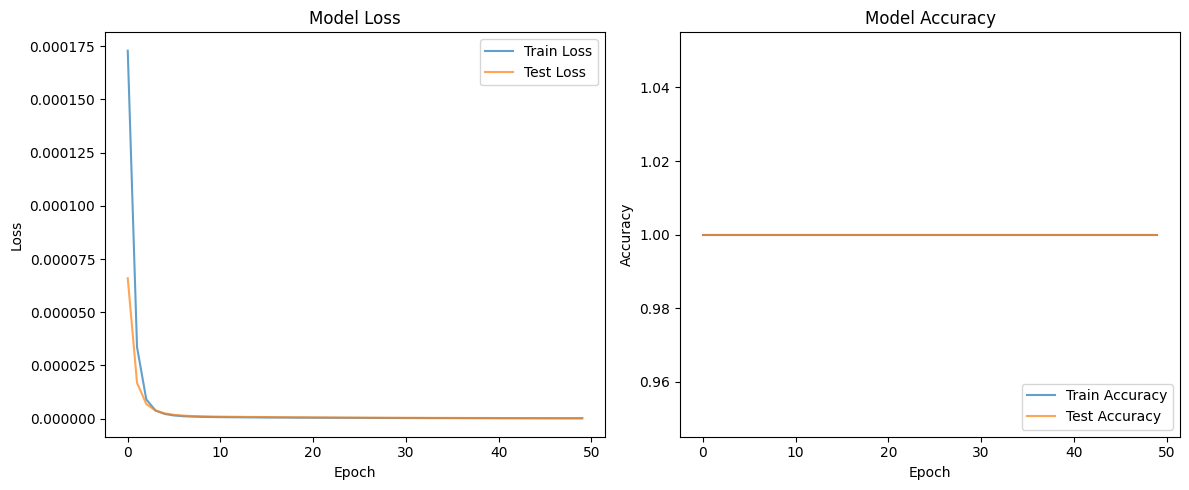

In [108]:
plot_history(history_fft_cnn)

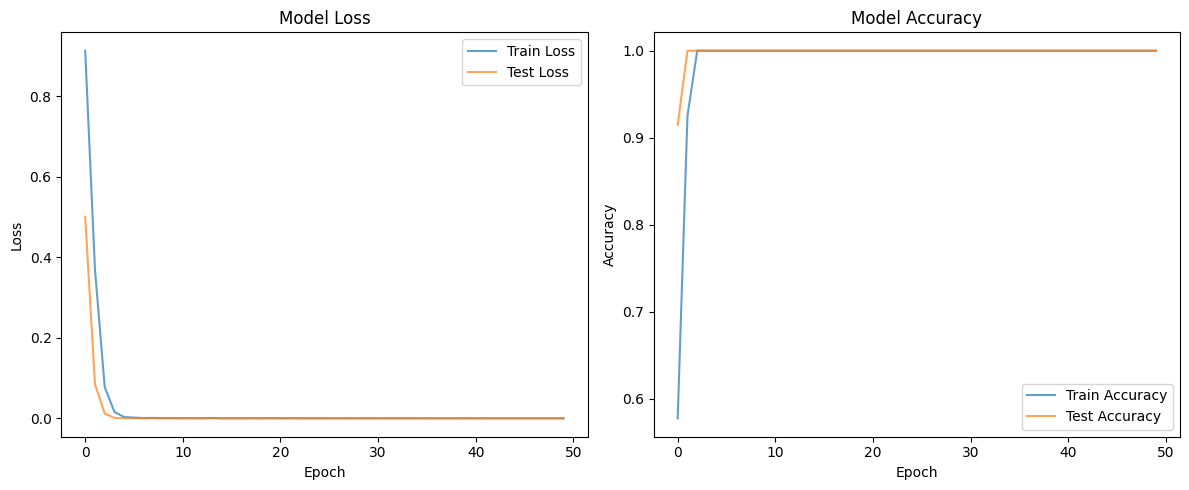

In [109]:
plot_history(history_raw_cnn)

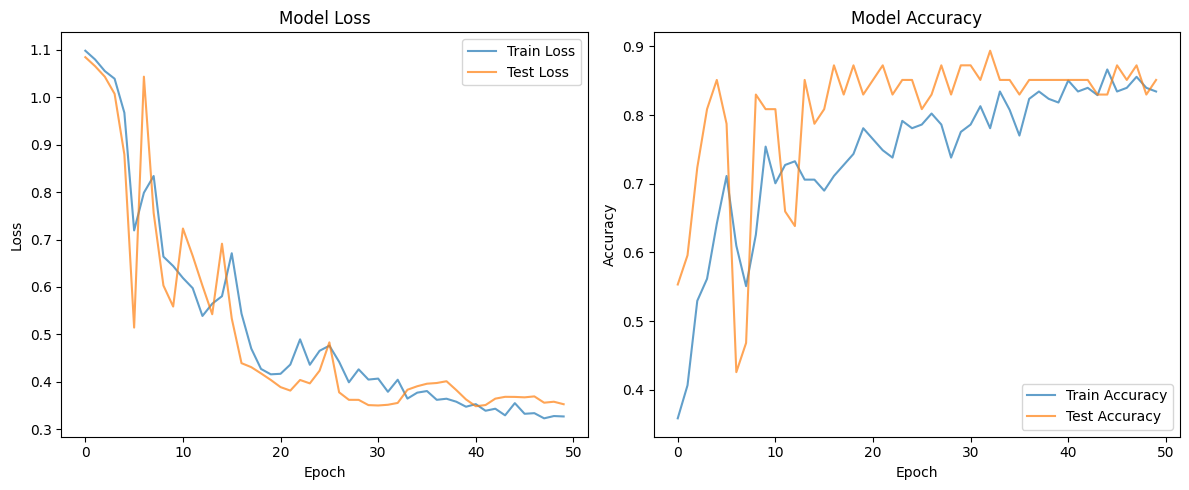

In [110]:
plot_history(history_raw_lstm)

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [112]:
def performance_matrix(model, X_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


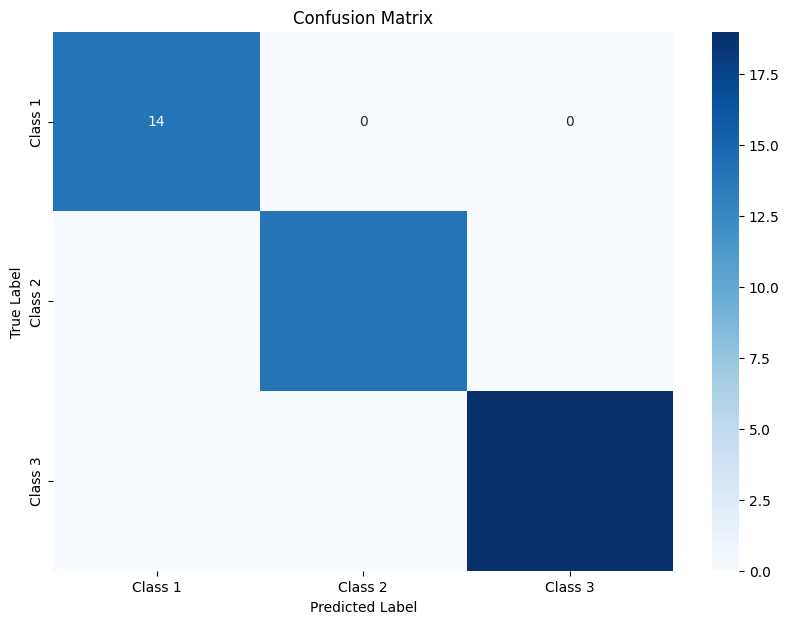

In [113]:
performance_matrix(fft_cnn, X_test_fft)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


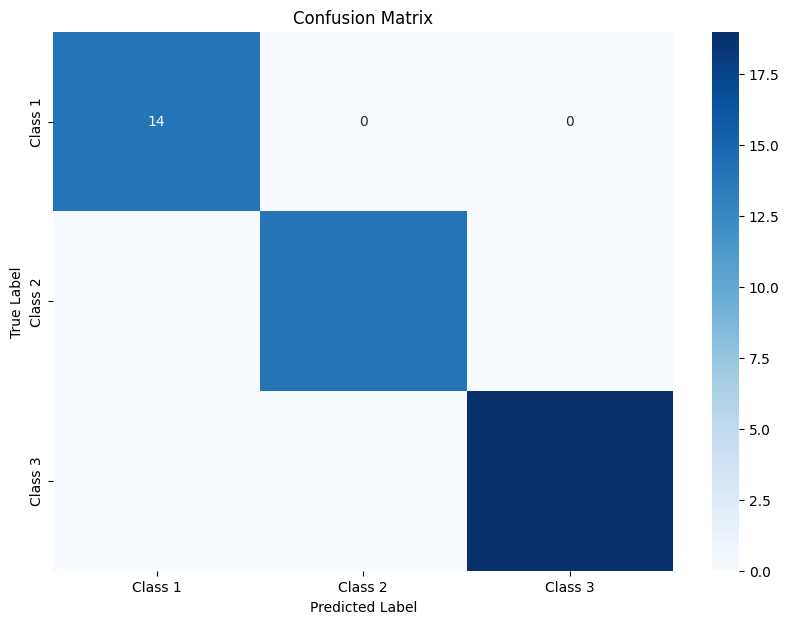

In [114]:
performance_matrix(raw_cnn, X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x31f5f2a20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


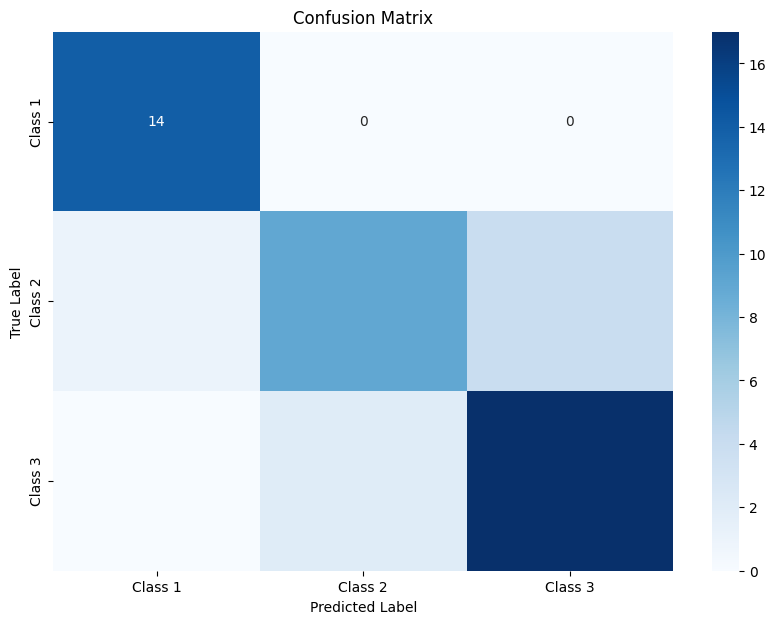

In [115]:
performance_matrix(raw_lstm, X_test)